# University Data - KMeans Clustering
In this ML project we are using the KMeans Clustering to segment university data.

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
import kaggle
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from summarytools import dfSummary
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline

## 1. Data and Visualization

In [64]:
# Open dataset
df = pd.read_csv("UniData.csv")
print(df.head(5))
dfSummary(df)

   Applications  Accept  Enroll  F_Undergrad  Grad_Rate
0          1660    1232     721         2885         60
1          2186    1924     512         2683         56
2          1428    1097     336         1036         54
3           417     349     137          510         59
4           193     146      55          249         15


No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Applications[int64],Mean (sd) : 2376.4 (2949.0)min < med < max:81.0 < 1199.0 < 20192.0IQR (CV) : 2241.2 (0.8),289 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACXElEQVR4nO3ZvY7aQBSG4TP8ySzEFmJlOpr0KShpcge52G1TrgRXkR4hWcYWXgiITKpNEyUsY5PlI+9TM2MXr8Y2x3nvDbh1rfe+AeAtOud+4Jzrm1kvcP+D934XuBb45a+hOuf64/H4SxzHo5DNy7LMnXNPxIq6zp2ovTiOR/P5fJckyf6SjYuiiBaLxSjLsp6ZESpqOfvoNzNLkmSfpulLwP79gDXAb/iYggRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChQRChYTONTc/nU5dM4udc6FbHLz3uwZvCaKuFmpVVd3j8fhpOp222+32PmSPsixz59wTseJqoR4Oh04URQ+z2Ww/mUzyS9cXRREtFotRlmU9MyPU/9xVH/1mZoPBYJ+m6Uvg8n6jNwNZfExBAqFCAqFCAqFCAqFCAqFCwtX/nqqj5mSLqdYdudlQ6062NpvN1jn31cyCpmJG6DflZkOtM9larVYflsvl5+l0+sj49j7cbKivQiZbeZ73645vn5+f0yzLHp1z5aXrjdO4cTcfah2h49u6rx2cxs2761BD1XntaOA0bpnZj4B1r+7yNH9TqEVRRJduvN1uIzOzqqqi9Xr98C/XN3XtELvdLvg0Pp1O3aqqPg6Hw2+tVusYcv0GPiLfy3fv/R/v+SdQiu5a3emizgAAAABJRU5ErkJggg=="">",0(0.0%)
2,Accept[int64],Mean (sd) : 1582.0 (1841.2)min < med < max:72.0 < 884.0 < 13243.0IQR (CV) : 1414.0 (0.9),284 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACXElEQVR4nO3dP2/aUBSG8XNKgswf2UAis7GydWBk6dS1HzZrRyT2fA0kB2xBQkHIndKlUgjXUHjd5zdzr430yBiOJbwsSwNu3ZdrnwDwGXfHXuDuLTNrBu6/K8vyLXAt8MeHobp76+Hh4Uccx/2QzYuiWLr7E7GiqmNX1GYcx/3pdPqWJMn2lI3zPI/m83k/y7KmmREqKjn60W9mliTJNk3T14D9WwFrgL/wZQoSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSPvXv0qEOh8O9mcXuHrrFrixL/kIdlwt1s9nc7/f7r6PRqNFoNLYhexRFsXT3J2LFxULd7XZ3URS1J5PJdjgcLk9dn+d5NJ/P+1mWNc2MUP9zF/3oNzPrdDrbNE1fA5e3znoykMWXKUggVEggVEggVEggVEggVEi4+M9TVVScbDHVqpGbDbXqZIupVr3cbKhVJltMternZkN9V2GyxVSrRm4+1FA8uVUvtQyVJ7fqp5ahnuPJrdlslmZZ9ujuRcgpEPh51TLUd6H3t1WvyKvVau3uP80s5GouG7m7t8ysGbj8w/f9qVDzPI9OPep6vY7MzDabTbRYLNr/cn3VY7+8vHSjKGqPx2Pv9Xq/Tlm7Wq26z8/P30aj0eMVIr+maDAYfE+SpBuy+Nit1m/bGu3QQl0T4AAAAABJRU5ErkJggg=="">",0(0.0%)
3,Enroll[int64],Mean (sd) : 608.4 (745.9)min < med < max:35.0 < 346.0 < 5873.0IQR (CV) : 443.0 (0.8),254 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACWklEQVR4nO3ZvY7aQBhG4W8CiwZYbH4i09EiESkFJU26lHux26anR7kLJMAmsLAg5FQbRYoSFpu/1zlPzXwzxRHGg0vT1IB79+HWBwDeo3zsA865qplVMs7fpWm6ybgW+OWfoTrnqp1O5ykIglaW4cvlcuGceyZW5HXsG7USBEFrNBptwjDcnjI4SRI/Ho9bs9msYmaEilyOPvrNzMIw3EZR9JJhfjXDGuAPvExBAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCAqFCQvmSww+Hw4OZBc65rCN2aZpuzngkiLpYqOv1+mG/33/u9XqlUqm0zTJjuVwunHPPxIqLhbrb7cre+9pwONx2u93FqeuTJPHj8bg1m80qZkao/7mLPvrNzOr1+jaKopeMy6tnPQxk8TIFCYQKCYQKCRf/jZpHzustrrYK5G5DzXu9xdVWsdxtqHmut7jaKp67DfVNjustrrYK5O5DzeqWf98656pmVrn2vkVWyFDP8fdtHMcr59w3Mzt1vW+321/DMKxfed83hQz9XaEmSeJPHbxarbyZ2Xq99tPptHbN9fP5/NF7X+v3+67ZbL6eunccx4+TyeRLr9f7eGro+/3em9mnwWDwvdFo/LjWvr/NyBv6rbymafrXM/8E1LfN0XNIHVUAAAAASUVORK5CYII="">",0(0.0%)
4,F_Undergrad[int64],Mean (sd) : 2797.5 (3943.4)min < med < max:139.0 < 1356.0 < 27378.0IQR (CV) : 1877.0 (0.7),289 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8fJSN1AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACW0lEQVR4nO3YMW/aUBSG4XMgQXZCbQGRs3np3oGRpVPX/tisHZHgV3SPIllgCwcEo

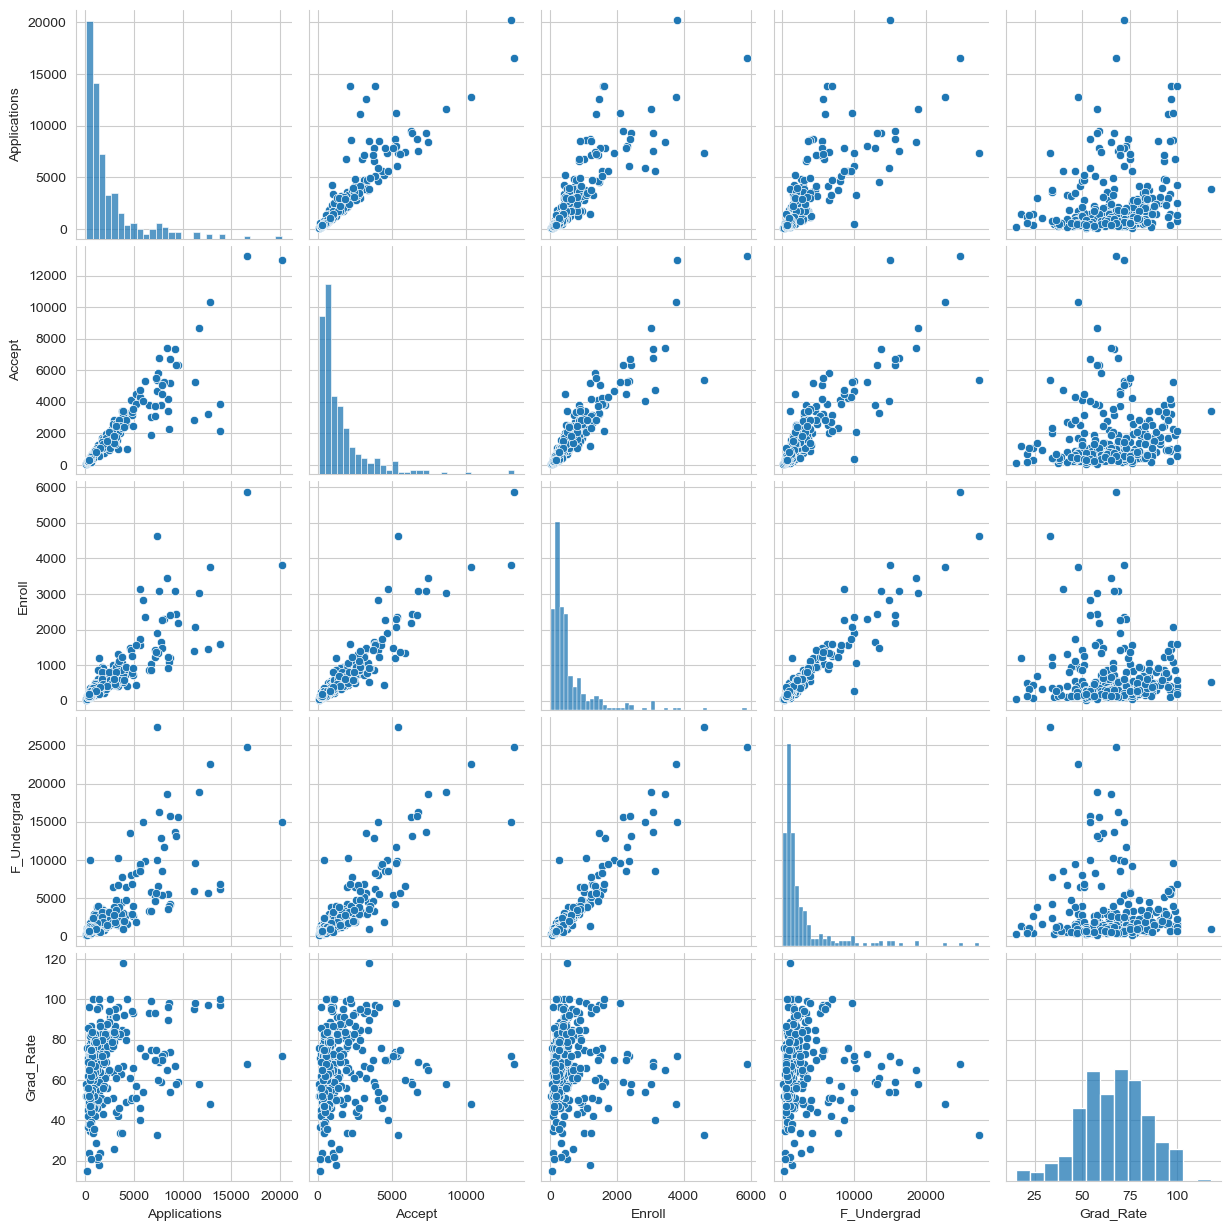

In [13]:
# Visualization: Application Acceptances
sns.set_style("whitegrid")
sns.pairplot(df)

In [19]:
# Scaling data

scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scale.head()

,Applications,Accept,Enroll,F_Undergrad,Grad_Rate
0,-0.243355,-0.190392,0.151213,0.022220,-0.351873
1,-0.064689,0.186073,-0.129450,-0.029091,-0.578523
2,-0.322159,-0.263836,-0.365797,-0.447453,-0.691848
3,-0.665565,-0.670767,-0.633031,-0.581065,-0.408536
4,-0.741651,-0.781204,-0.743148,-0.647363,-2.901680


## 2. KMeans Clustering
Using the inertia from the ellbow method and the silhouette_score to identify the optimal cluster number.


In [21]:
# Find best cluster number
warnings.filterwarnings('ignore')

max_cluster_n = 8
inertia_nD = {}
silhouette_nD = {}
labels_nD = {}

for i in range(1,max_cluster_n):
    kmeans = KMeans(n_clusters = i, random_state = 42, init="k-means++")
    kmeans.fit(df_scale)
    
    inertia_nD[i] = kmeans.inertia_
    labels_nD[i] = kmeans.labels_
    if i >= 2:
        silhouette_nD[i] = silhouette_score(df_scale, kmeans.fit_predict(df_scale))

print(inertia_nD)
print(silhouette_nD)                                 

{1: 1499.9999999999998, 2: 734.1617277219661, 3: 554.0839101801323, 4: 398.84727980465357, 5: 338.6010909027382, 6: 292.2742877513543, 7: 239.87484084619956}
{2: 0.6441351041471588, 3: 0.5429523767082411, 4: 0.3816084500844185, 5: 0.34033426427154306, 6: 0.3658073595442368, 7: 0.37370330894244724}


Text(0.5, 1.0, 'Ellbow Curve')

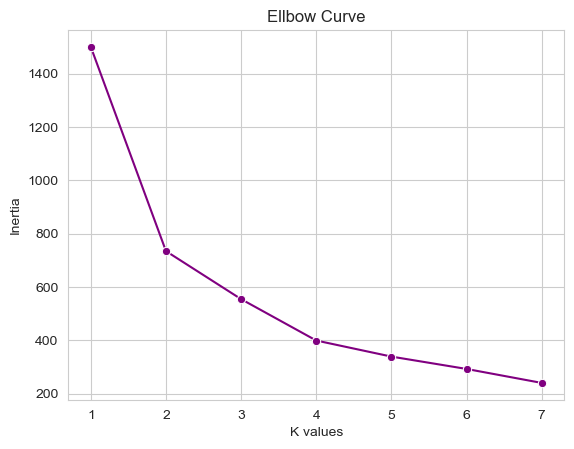

In [23]:
# Visualize Ellbow-Curve

sns.lineplot(x = inertia_nD.keys(), y= inertia_nD.values(), marker="o", color="purple")
plt.xlabel("K values")
plt.ylabel("Inertia")
plt.title("Ellbow Curve")

Text(0.5, 1.0, 'Silhouette Score')

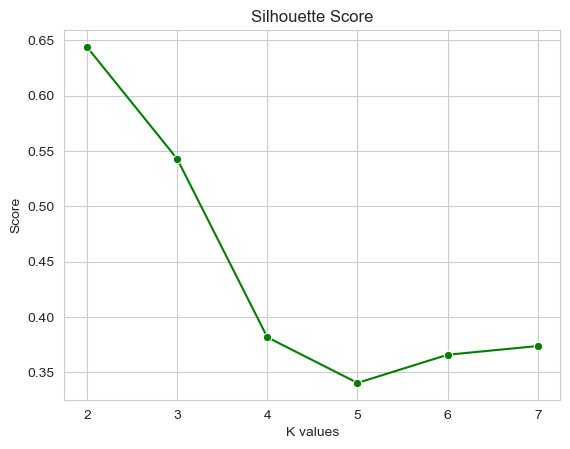

In [25]:
# Visualize Silhouette Score

sns.set_style("whitegrid")
sns.lineplot(x = silhouette_nD.keys(), y= silhouette_nD.values(), marker="o", color="green")
plt.xlabel("K values")
plt.ylabel("Score")
plt.title("Silhouette Score")

In [66]:
# Cluster Data for K=2

df["nD Clusters K=2"] = labels_nD[2]
df

,Applications,Accept,Enroll,F_Undergrad,Grad_Rate,nD Clusters K=2
0,1660,1232,721,2885,60,0
1,2186,1924,512,2683,56,0
2,1428,1097,336,1036,54,0
3,417,349,137,510,59,0
4,193,146,55,249,15,0
...,...,...,...,...,...,...
295,355,300,142,509,65,0
296,1040,845,286,967,79,0
297,361,321,185,650,52,0
298,2929,1834,622,2738,84,0


## 5. N-dimensional Clustering with PCA

As the results for the n-dimensional clustering were not that useful, we are doing a dimension reduction with PCA.

In [68]:
pca = PCA(n_components=2)

df_PCA = pd.DataFrame(pca.fit_transform(df_scale),columns=['PCA1','PCA2'])

In [70]:
# Find best cluster number
warnings.filterwarnings('ignore')

inertia_PCA = {}
silhouette_PCA = {}
labels_PCA = {}

for i in range(1,max_cluster_n):
    kmeans = KMeans(n_clusters = i, random_state = 42, init="k-means++")
    kmeans.fit(df_PCA)
    
    inertia_PCA[i] = kmeans.inertia_
    labels_PCA[i] = kmeans.labels_
    if i >= 2:
        silhouette_PCA[i] = silhouette_score(df_PCA, kmeans.fit_predict(df_PCA))

print(inertia_PCA)
print(silhouette_PCA)                                 

{1: 1409.7165725624147, 2: 645.3189422539649, 3: 470.55120802434095, 4: 317.8523500937398, 5: 263.5533734378648, 6: 241.10633045227002, 7: 175.68038532012585}
{2: 0.6555974035967214, 3: 0.5548204410457845, 4: 0.40399784591592974, 5: 0.40163574527498086, 6: 0.3909230842111898, 7: 0.36464842933815805}


Text(0.5, 1.0, 'Ellbow Curve')

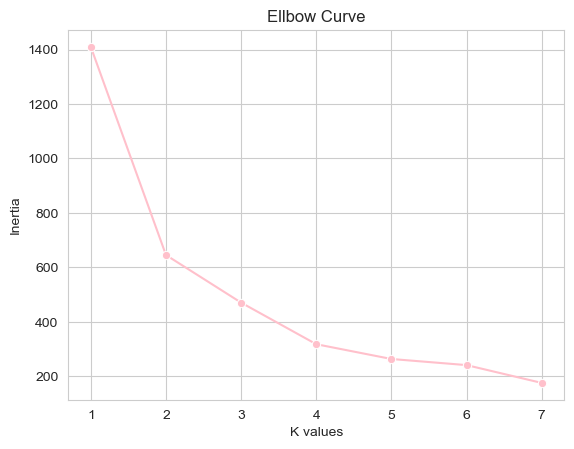

In [72]:
# Visualize Ellbow-Curve

sns.lineplot(x = inertia_PCA.keys(), y= inertia_PCA.values(), marker="o", color="pink")
plt.xlabel("K values")
plt.ylabel("Inertia")
plt.title("Ellbow Curve")

Text(0.5, 1.0, 'Silhouette Score')

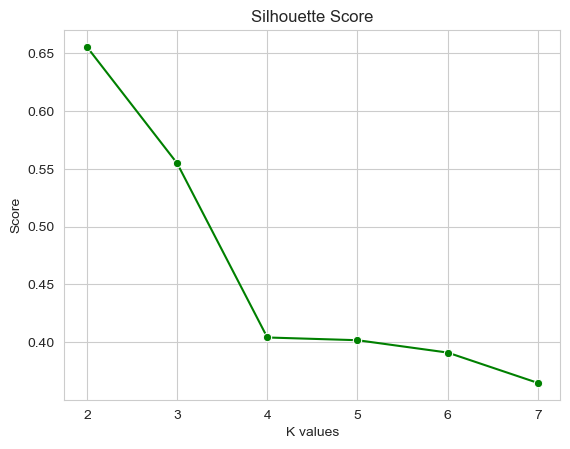

In [74]:
# Visualize Silhouette Score

sns.set_style("whitegrid")
sns.lineplot(x = silhouette_PCA.keys(), y= silhouette_PCA.values(), marker="o", color="green")
plt.xlabel("K values")
plt.ylabel("Score")
plt.title("Silhouette Score")

In [76]:
# Cluster Data for K=2

df["2D PCA Clusters K=2"] = labels_PCA[2]
df_PCA["2D PCA Clusters K=2"] = labels_PCA[2]
df

,Applications,Accept,Enroll,F_Undergrad,Grad_Rate,nD Clusters K=2,2D PCA Clusters K=2
0,1660,1232,721,2885,60,0,0
1,2186,1924,512,2683,56,0,0
2,1428,1097,336,1036,54,0,0
3,417,349,137,510,59,0,0
4,193,146,55,249,15,0,0
...,...,...,...,...,...,...,...
295,355,300,142,509,65,0,0
296,1040,845,286,967,79,0,0
297,361,321,185,650,52,0,0
298,2929,1834,622,2738,84,0,0


Text(0.5, 1.0, 'Clustering in 2-PCA Dimensions')

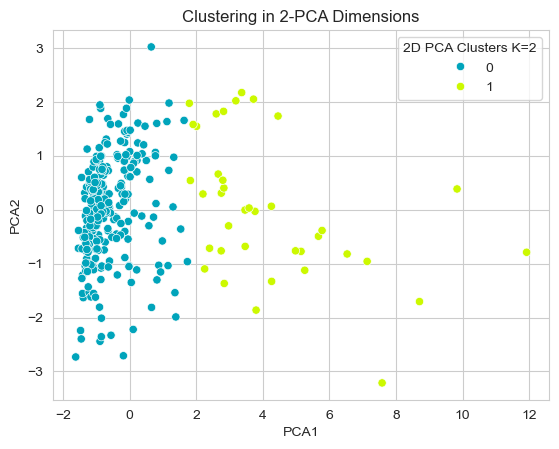

In [78]:
# Visualize 2dim PCA Clusters
sns.scatterplot(df_PCA, x="PCA1", y="PCA2", hue="2D PCA Clusters K=2", palette="nipy_spectral")
plt.title("Clustering in 2-PCA Dimensions")